TP2 : REGRESSION LOGISTIQUE

Groupe 4:
    FOUKONG DOUO Afred - 20U2997
    BAKAMBA ABIODO Michel Fredy - 19Y077
    MVOGO MONDOMAN Franck Stephane - 20Y058
    BIBOUE LIMALEBA Stephane - 19U2997

Etape 1 : Importation de bibliothèques

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, roc_curve, precision_recall_curve, confusion_matrix

Etape 2 : Exploration et Importation des données

Dataset : https://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
df = pd.read_csv('adult.csv', na_values='?')

In [3]:
df.columns #On vérifie les colonnes

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

Notre cible ici est le champs ' <=50K', renommons le en 'Cible'

In [4]:
df = df.rename(columns={'39':' 39',' <=50K': 'Cible'})

df['Cible'].value_counts() #Comptons et affichons le nombre de chaque valeurs du champs

Cible
 <=50K    24719
 >50K      7841
Name: count, dtype: int64

<Axes: xlabel='Cible', ylabel='count'>

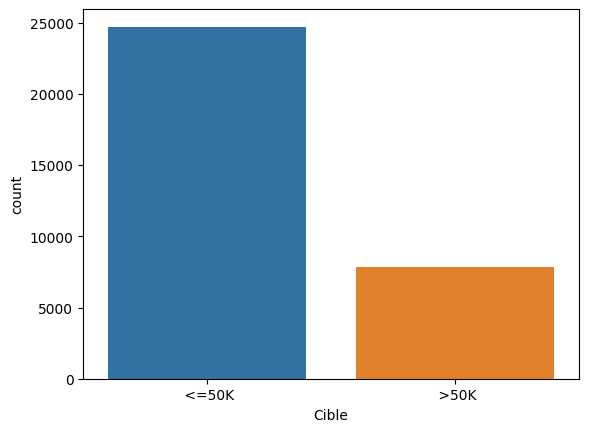

In [5]:
sns.countplot(x='Cible', data=df) #visualisation du rapport entre nos deux classes de la cible

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    39             32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14  Cible           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Cible
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Vérifions si nous avons des valeurs manquantes dans nos données


on peut utiliser la fonction isnull() ou heatmap() de la bibliothèque seaborn

<Axes: >

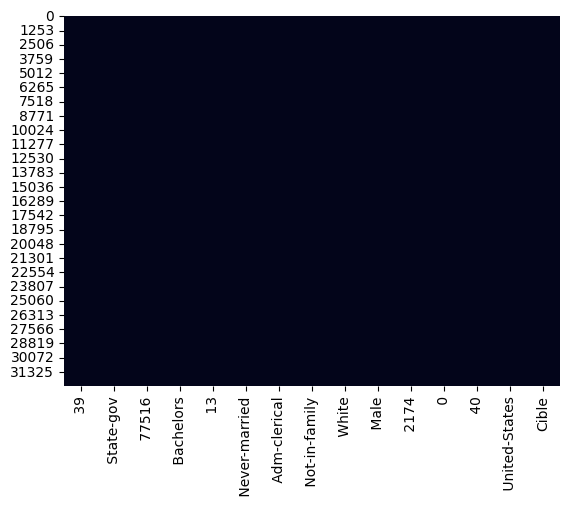

In [8]:
sns.heatmap(df.isnull(), cbar=False)

Ce carré plein sans bandes blanches montre qu'il y'a pad de valeurs manquantes

Etape 3 : Transformation des variables catégorielles: créer des variables fictives

Examinons les variables de types 'objets'

In [9]:
#Comptons et affichons les occurences des différentes valeurs du champs
df[' Male'].value_counts(dropna=False) 

 Male
 Male      21789
 Female    10771
Name: count, dtype: int64

In [10]:
#Comptons et affichons les occurences des différentes valeurs du champs
df[' White'].value_counts(dropna=False)

 White
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [11]:
#Comptons et affichons les occurences des différentes valeurs du champs
df[' Not-in-family'].value_counts(dropna=False)

 Not-in-family
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [12]:
#Comptons et affichons les occurences des différentes valeurs du champs
df[' State-gov'].value_counts(dropna=False)

 State-gov
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [13]:
#Comptons et affichons les occurences des différentes valeurs du champs
df[' Bachelors'].value_counts(dropna=False)

 Bachelors
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [14]:
#Comptons et affichons les occurences des différentes valeurs du champs
df[' Never-married'].value_counts(dropna=False)

 Never-married
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [15]:
#Comptons et affichons les occurences des différentes valeurs du champs
df[' Adm-clerical'].value_counts(dropna=False)

 Adm-clerical
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [16]:
#Comptons et affichons les occurences des différentes valeurs du champs
df[' United-States'].value_counts(dropna=False)

 United-States
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

Créons des variables fictives pour les attributs pertinents

In [17]:
# Création des minis dataframes des variables fictives
Male_data = pd.get_dummies(df[' Male'], drop_first=True)
White_data = pd.get_dummies(df[' White'], drop_first=True)
Profession_data = pd.get_dummies(df[' Adm-clerical'], drop_first=True)

In [18]:
clean = df.copy()

In [19]:
#Supression des colonnes que nous n'utiliserons pas
clean.drop([' Bachelors',' Adm-clerical', ' Male', ' White', ' United-States', ' Never-married', ' Not-in-family', ' State-gov'], axis=1, inplace = True)

In [20]:
clean

,39,77516,13,2174,0,40,Cible
0,50,83311,13,0,0,13,<=50K
1,38,215646,9,0,0,40,<=50K
2,53,234721,7,0,0,40,<=50K
3,28,338409,13,0,0,40,<=50K
4,37,284582,14,0,0,40,<=50K
...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,<=50K
32556,40,154374,9,0,0,40,>50K
32557,58,151910,9,0,0,40,<=50K
32558,22,201490,9,0,0,20,<=50K


In [21]:
clean = pd.concat([clean, Male_data, White_data, Profession_data], axis=1)

In [22]:
#Affichons le dataframe nettoyé
clean

,39,77516,13,2174,0,40,Cible,Male,Asian-Pac-Islander,Black,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,50,83311,13,0,0,13,<=50K,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,38,215646,9,0,0,40,<=50K,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,53,234721,7,0,0,40,<=50K,True,False,True,...,False,True,False,False,False,False,False,False,False,False
3,28,338409,13,0,0,40,<=50K,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,37,284582,14,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,<=50K,False,False,False,...,False,False,False,False,False,False,False,False,True,False
32556,40,154374,9,0,0,40,>50K,True,False,False,...,False,False,True,False,False,False,False,False,False,False
32557,58,151910,9,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32558,22,201490,9,0,0,20,<=50K,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# Séparation des champs numériques des champs catégoriels
numeric_cols = [' 39', ' 77516', ' 13', ' 2174', ' 0', ' 40']
cat_cols = list(set(clean.columns) - set(numeric_cols) - {'Cible'}) #Une liste formée des attributs non numériques et de l'attribut cible
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

[' 39', ' 77516', ' 13', ' 2174', ' 0', ' 40']
[' Adm-clerical', ' Armed-Forces', ' Asian-Pac-Islander', ' Black', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Male', ' Other', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving', ' White']


Etape 4: Séparation des ensembles des données

In [57]:
random_seed = 888
df_train, df_test = train_test_split(clean, test_size=0.2, random_state=random_seed, stratify=clean['Cible'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['Cible'].value_counts(normalize=True))
print()
print(df_test['Cible'].value_counts(normalize=True))

(26048, 26)
(6512, 26)

Cible
 <=50K    0.759175
 >50K     0.240825
Name: proportion, dtype: float64

Cible
 <=50K    0.759214
 >50K     0.240786
Name: proportion, dtype: float64


Etape 5: Transformation des variables numériques : mise à l'échelle

In [58]:
scaler = StandardScaler()
#Faisons la mise à l'échelle des variables numériques
# Ajustons les grace à l'écart-type
scaler.fit(df_train[numeric_cols]) 

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols]) # Tableau de normalisation des attributs numériques
    #print(X_numeric_scaled)
    X_categorical = df[cat_cols].to_numpy() # Transformation des attributs catégoriels en tableau numpy
    #print(X_categorical)
    X = np.hstack((X_categorical, X_numeric_scaled)) # Fusion des deux tableaux
    y = df['Cible'] # Affectation de la colonne cible
    return X, y

# y_target = colonne cible
X, y_target = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

Etape 6 : Ajustement du modèle de régression logistique

In [59]:
Model = LogisticRegression(max_iter=150) # logistic regression with no penalty term in the cost function.
# Nous augmentons le nombre maximal d'itération car à 100 itération le modèle
# n'est pas complet
Model.fit(X, y_target)

LogisticRegression(max_iter=150)

Etape 7: Evaluation du modèle

In [60]:
# Jeu de données mis à l'échelle
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)
y_test

25069     <=50K
2742      <=50K
24461     <=50K
15424      >50K
30712     <=50K
          ...  
7260       >50K
32087     <=50K
13861      >50K
5819      <=50K
30107     <=50K
Name: Cible, Length: 6512, dtype: object

In [61]:
probs = Model.predict_proba(X_test)
prob = probs[:,1]

In [83]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC(Receiver Operating Characteristic Curve)')
    plt.legend()
    plt.show()

In [84]:
fper, tper, residus = roc_curve(y_test, prob, pos_label=' >50K')

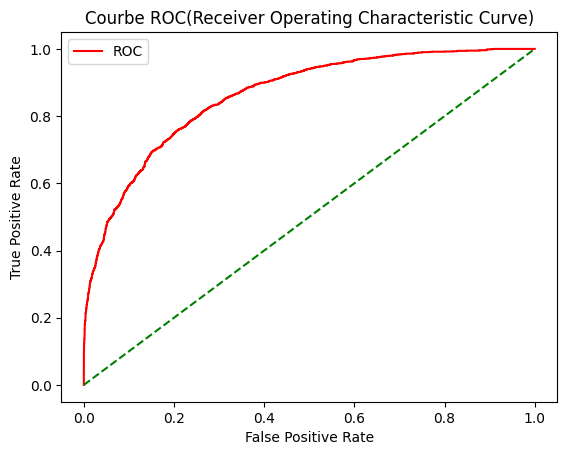

In [85]:
plot_roc_curve(fper, tper)

In [86]:
def plot_precision_recall_curve(rec, pre):
    plt.plot(fper, tper, color='red', label='Precision')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Courbe Precision Recall Curve)')
    plt.legend()
    plt.show()

In [87]:
prev = Model.predict(X_test) # Prédiction du model selon les données test

In [105]:
#rec, pre, residus0 = precision_recall_curve(y_test, prev, pos_label=' >50K')

In [79]:
test_prob = Model.predict_proba(X_test)[:, 1]
test_pred = Model.predict(X_test)

In [90]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob, pos_label=' >50K')))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred, pos_label=' >50K')))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred, pos_label=' >50K')))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred, pos_label=' >50K')))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.37120
AUC = 0.86186
Average Precision = 0.71121

Using 0.5 as threshold:
Accuracy = 0.83461
Precision = 0.73139
Recall = 0.49490
F1 score = 0.59034

Classification Report
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.90      4944
        >50K       0.73      0.49      0.59      1568

    accuracy                           0.83      6512
   macro avg       0.79      0.72      0.74      6512
weighted avg       0.83      0.83      0.82      6512



In [97]:
# Confusion Matrix
y_pred = Model.predict(X_test)
mat_con = confusion_matrix(y_true=y_test, y_pred=y_pred)

Confusion Matrix


Text(50.722222222222214, 0.5, 'Valeurs actuelles')

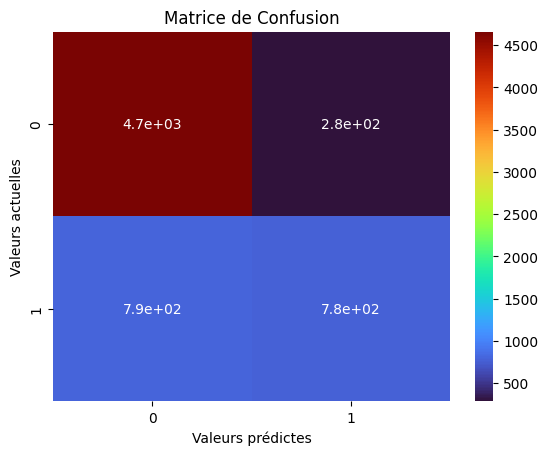

In [103]:
#Création d'un carré
fx = sns.heatmap(mat_con, annot=True, cmap='turbo')

fx.set_title('Matrice de Confusion')
fx.set_xlabel('Valeurs prédictes')
fx.set_ylabel('Valeurs actuelles')

Etape 8: Interprétation des résultats

In [46]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-3.491747
1,Adm-clerical,0.666406
2,Armed-Forces,-0.100262
3,Asian-Pac-Islander,0.448569
4,Black,0.253822
5,Craft-repair,0.683444
6,Exec-managerial,1.410201
7,Farming-fishing,-0.584048
8,Handlers-cleaners,-0.322879
9,Machine-op-inspct,0.389482


In [47]:
# Calcul de l'écart-type de chaque variable numériques
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)}) 

,variable,unit
0,39,13.611549
1,77516,105364.126717
2,13,2.586463
3,2174,7360.250076
4,0,400.897711
5,40,12.287080


Interprétations:

Les hommes ont 30% (exp(1.138659)) de plus que les femmes d'avoir un revenu annuel d'au moins 50K

Les personnes de race blanche ont plus de chance d'avoir un salaire d'au moins 50K 

Observation:

Les valeurs utilisées ne peuvent être que numériques ou catégorielles

 Il est difficile de construire un modèle par regression logistique lorsque les attributs peuvent avoir un nombre infini de valeurs